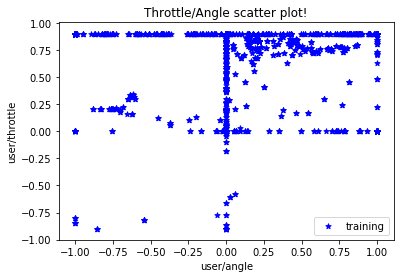

In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import glob
import json

colors = "bgrcmykw"
color_index = 0

tubdata={}

tub_path='/home/ec2-user/SageMaker/donkey/sagetrain/container/local_test/test_dir/input/data/training/*.json'

for name in glob.glob(tub_path):
    tubname = str(name.split('/')[11])
    if tubname not in tubdata:
        tubdata[tubname]={}
        tubdata[tubname]['x']=[]
        tubdata[tubname]['y']=[]
        tubdata[tubname]['color']=colors[color_index%len(colors)]
        color_index += 1

for name in glob.glob(tub_path):
    tubname = str(name.split('/')[11])
    #print("Tub {}".format(tubname))
    with open(name) as json_file:
        data = json.load(json_file)
        if 'user/angle' in data:
            tubdata[tubname]['x'].append(data['user/angle'])
            tubdata[tubname]['y'].append(data['user/throttle'])


for key, value in tubdata.items():
    plt.scatter(tubdata[key]['x'],tubdata[key]['y'],
                label=key, color=tubdata[key]['color'],
                marker="*", s=30)
plt.xlabel('user/angle')
plt.ylabel('user/throttle')
plt.title('Throttle/Angle scatter plot!')
plt.legend()

plt.show()

In [5]:
import os
for filename in os.listdir():
    info = os.stat(filename)
    print info.st_mtime
    
    

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(int info.st_mtime)? (<ipython-input-5-aa8c88375e6f>, line 4)

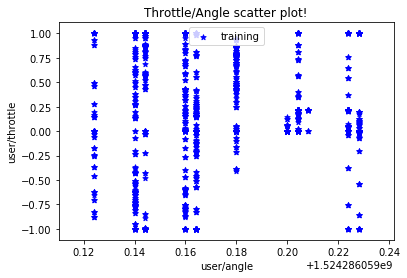

In [7]:
%matplotlib inline

import matplotlib.pyplot as plt
import glob
import json
import os

colors = "bgrcmykw"
color_index = 0

tubdata={}

tub_path='/home/ec2-user/SageMaker/donkey/sagetrain/container/local_test/test_dir/input/data/training/*.json'

for name in glob.glob(tub_path):
    tubname = str(name.split('/')[11])
    if tubname not in tubdata:
        tubdata[tubname]={}
        tubdata[tubname]['x']=[]
        tubdata[tubname]['y']=[]
        tubdata[tubname]['color']=colors[color_index%len(colors)]
        color_index += 1

for name in glob.glob(tub_path):
    tubname = str(name.split('/')[11])

    info = os.stat(name)
    #print info.st_mtime
    
    with open(name) as json_file:
        data = json.load(json_file)
        if 'user/angle' in data:
            tubdata[tubname]['x'].append(info.st_mtime)
            #tubdata[tubname]['x'].append(data['user/angle'])
            #tubdata[tubname]['y'].append(data['user/throttle'])
            tubdata[tubname]['y'].append(data['user/angle'])
            
for key, value in tubdata.items():
    plt.scatter(tubdata[key]['x'],tubdata[key]['y'],
                label=key, color=tubdata[key]['color'],
                marker="*", s=30)
plt.xlabel('user/angle')
plt.ylabel('user/throttle')
plt.title('Throttle/Angle scatter plot!')
plt.legend()

plt.show()